# Project: Bright & Hove Airbnb

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

In [5]:
df_raw = pd.read_csv(r"C:\Users\Admin\Downloads\BrightonPerformanceData.csv")
df_raw

,Property Type,Listing Type,Bedrooms,Bathrooms,Country Code,City,Zipcode,Latitude,Longitude,Currency Native,...,Blocked Days,Available Days,Scraped During Month,Occupancy Rate,Reservation Days,ADR (USD),ADR (Native),Number Of Reservation,Revenue (USD),Revenue (Native)
0,Entire home,entire_home,2,2,GB,Brighton,BN1 1BG,50.82214,-0.14175,USD,...,0,31,True,46.5,12,244,193,1,2974,2349
1,Entire rental unit,entire_home,1,1,GB,Brighton,BN1 4AQ,50.82745,-0.14099,USD,...,0,31,True,7.7,2,171,135,2,342,270
2,Private room in rental unit,private_room,1,1,GB,Brighton,BN3 4GP,50.82537,-0.18462,USD,...,0,31,True,15.5,4,73,58,2,312,246
3,Entire townhouse,entire_home,6,3,GB,Brighton,BN2 9XH,50.82828,-0.12467,USD,...,0,31,True,0.0,0,537,424,0,0,0
4,Entire rental unit,entire_home,1,2,GB,Hove,BN3 3UA,50.83128,-0.16963,USD,...,0,31,True,100.0,31,95,75,0,2945,2327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24844,Entire vacation home,entire_home,2,1,GB,Kemptown,BN2 1PB,50.82000,-0.13200,USD,...,1,30,True,100.0,26,151,119,5,3926,3102
24845,Private room in townhouse,private_room,Studio,0,GB,Brighton and Hove,BN2 9NY,50.82823,-0.12913,USD,...,2,29,True,37.2,9,81,64,4,729,576
24846,Entire condo,entire_home,1,2,GB,Brighton and Hove,BN3 3QB,50.83145,-0.16843,USD,...,25,6,True,20.0,1,104,82,0,104,82
24847,Entire condo,entire_home,1,1,GB,Brighton and Hove,BN3 2DL,50.82802,-0.17510,USD,...,5,26,True,55.4,12,82,65,5,984,777


In [6]:
# missing values of dataset
for i in df_raw.columns.unique():
    missing_data = df_raw[i].isna().sum()
    if missing_data > 0:
        missing_percent = (missing_data/len(df_raw))*100
        print(f'Column {i} has {missing_data}: {missing_percent:,.3f}%')

Column Zipcode has 66: 0.266%
Column cleaning_fee has 9013: 36.271%


In [7]:
# drop irrelevant columns
irr_cols = ['Country Code','Zipcode','Currency Native', 'Airbnb Property ID', 'Airbnb Host ID', 'last_seen','Blocked Days','Scraped During Month','ADR (Native)','Revenue (Native)']
df = df_raw.drop(columns=(irr_cols))
df

,Property Type,Listing Type,Bedrooms,Bathrooms,City,Latitude,Longitude,cleaning_fee,Reporting Month,Available Days,Occupancy Rate,Reservation Days,ADR (USD),Number Of Reservation,Revenue (USD)
0,Entire home,entire_home,2,2,Brighton,50.82214,-0.14175,46.0,2023-10,31,46.5,12,244,1,2974
1,Entire rental unit,entire_home,1,1,Brighton,50.82745,-0.14099,NaN,2023-10,31,7.7,2,171,2,342
2,Private room in rental unit,private_room,1,1,Brighton,50.82537,-0.18462,10.0,2023-10,31,15.5,4,73,2,312
3,Entire townhouse,entire_home,6,3,Brighton,50.82828,-0.12467,260.0,2023-10,31,0.0,0,537,0,0
4,Entire rental unit,entire_home,1,2,Hove,50.83128,-0.16963,33.0,2023-10,31,100.0,31,95,0,2945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24844,Entire vacation home,entire_home,2,1,Kemptown,50.82000,-0.13200,NaN,2022-11,30,100.0,26,151,5,3926
24845,Private room in townhouse,private_room,Studio,0,Brighton and Hove,50.82823,-0.12913,NaN,2022-11,29,37.2,9,81,4,729
24846,Entire condo,entire_home,1,2,Brighton and Hove,50.83145,-0.16843,NaN,2022-11,6,20.0,1,104,0,104
24847,Entire condo,entire_home,1,1,Brighton and Hove,50.82802,-0.17510,NaN,2022-11,26,55.4,12,82,5,984


## Feature Classification

### Categorical Features

In [10]:
categorical_cols = ['Property Type', 'Listing Type', 'Bedrooms', 'Bathrooms', 'City','Reporting Month']
def convert_category(df, features):
    for i in features:
        df[i] = df[i].astype('category')
convert_category(df, categorical_cols)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24849 entries, 0 to 24848
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Property Type          24849 non-null  category
 1   Listing Type           24849 non-null  category
 2   Bedrooms               24849 non-null  category
 3   Bathrooms              24849 non-null  category
 4   City                   24849 non-null  category
 5   Latitude               24849 non-null  float64 
 6   Longitude              24849 non-null  float64 
 7   cleaning_fee           15836 non-null  float64 
 8   Reporting Month        24849 non-null  category
 9   Available Days         24849 non-null  int64   
 10  Occupancy Rate         24849 non-null  float64 
 11  Reservation Days       24849 non-null  int64   
 12  ADR (USD)              24849 non-null  int64   
 13  Number Of Reservation  24849 non-null  int64   
 14  Revenue (USD)          24849 non-null 

## Distribution of Numerical and Categorical features

### Numerical

In [14]:
df.describe()

,Latitude,Longitude,cleaning_fee,Available Days,Occupancy Rate,Reservation Days,ADR (USD),Number Of Reservation,Revenue (USD)
count,24849.000000,24849.000000,15836.000000,24849.000000,24849.000000,24849.000000,24849.000000,24849.000000,24849.000000
mean,50.828409,-0.145077,51.998564,24.652904,66.041664,14.021731,195.492374,3.416113,2659.029176
std,0.009467,0.024413,58.669597,8.109489,30.089373,8.346904,179.582532,3.496327,2809.913855
min,50.807684,-0.227090,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,50.822070,-0.156930,0.000000,22.000000,41.700000,7.000000,98.000000,1.000000,969.000000
50%,50.826460,-0.142080,39.000000,28.000000,70.300000,14.000000,147.000000,3.000000,1980.000000
75%,50.832315,-0.131010,78.000000,30.000000,96.900000,21.000000,225.000000,5.000000,3427.000000
max,50.876110,-0.044820,566.000000,31.000000,100.000000,31.000000,2708.000000,27.000000,64005.000000


In [15]:
sns.set_theme()

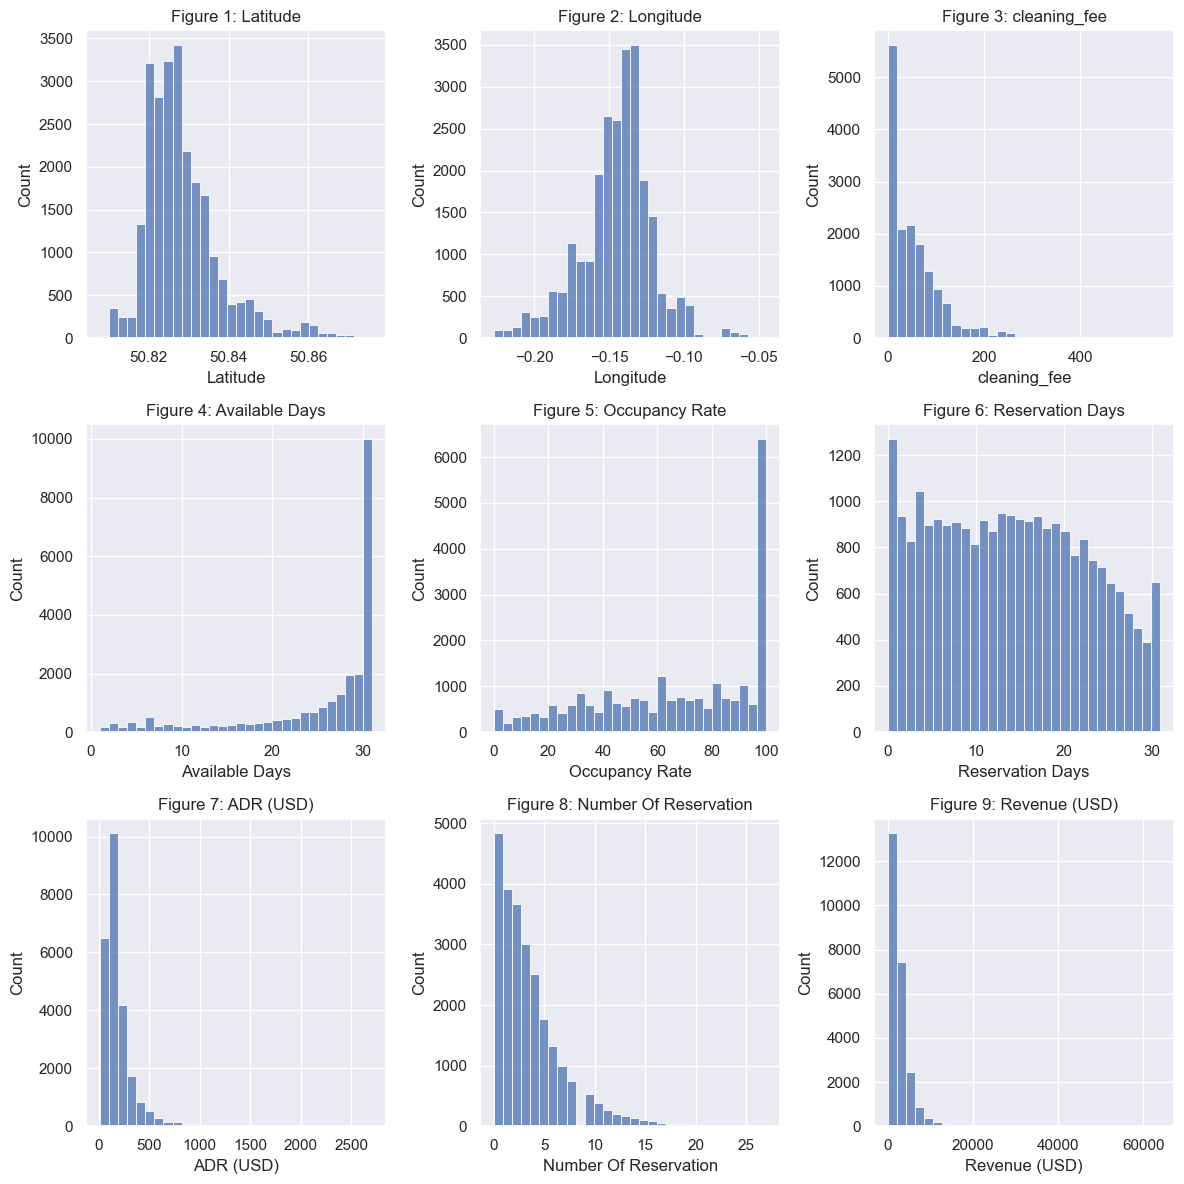

In [16]:
num_cols = ['Latitude','Longitude','cleaning_fee','Available Days','Occupancy Rate','Reservation Days','ADR (USD)','Number Of Reservation','Revenue (USD)']

n_rows = 3
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4,n_rows*4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(num_cols):
            ax_i = ax[r,c]
            sns.histplot(data = df, x=num_cols[i], ax=ax_i, bins = 30)
            ax_i.set(title = f'Figure {i+1}: {num_cols[i]}')
plt.tight_layout()
# ax.flat[-1:-2].set_visible(False);

* `cleaning_fee`: The values range between 0-566. According to the histogram, most cleaning_fee values are under USD 200, and concentrated under USD 20
* `Available Days`: The maximum is 31 days, while some listings have only 1 day. And 50% of Airbnb listings have more than 28 available days for rent
* `Occupancy Rate`: Only 25% of listings reach about 97% occupancy. A sharp spike at 100% occupancy — This suggests that while most listings have moderate occupancy, there's a substantial group of top performers
* `Reservation Days`: The distribution is relatively even between 1-22 days and then gradually declines from 23-29 days. And there is a sudden rise at 30-day
* `Number of Reservation`: Most listings receive fewer than 5 reservations
* `Revenue (USD)`: Revenue ranges from 0 to 64k. However, 75% of listings earns under USD 3500. Based on the histogram, revenue mostly fall under USD 10k

### Categorical

In [19]:
df.describe(include='category')

,Property Type,Listing Type,Bedrooms,Bathrooms,City,Reporting Month
count,24849,24849,24849,24849,24849,24849
unique,56,4,14,10,39,12
top,Entire rental unit,entire_home,1,1,Brighton and Hove,2023-08
freq,7636,18592,13680,16558,12588,3216


#### Listing Type

C:\Users\Admin\AppData\Local\Temp\ipykernel_8360\3505023087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Listing Type', palette = 'Blues')


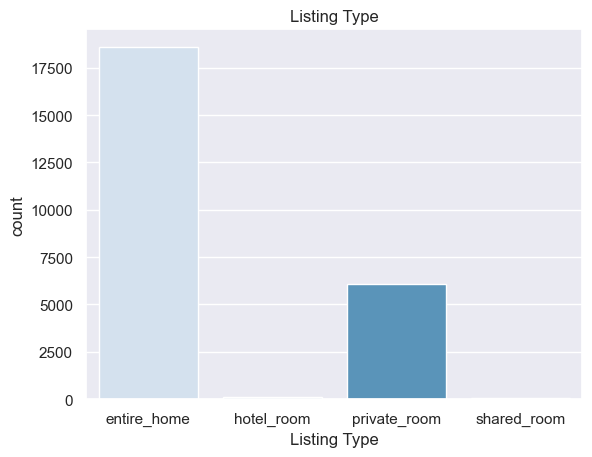

In [21]:
fig, ax = plt.subplots()
sns.countplot(data = df, x = 'Listing Type', palette = 'Blues')
ax.set(title = 'Listing Type');

* `Listing Type`: The most frequent type is `entire_home`
* 1-bedroom and 1-bathroom are the most popular type 
* `Brighton and Hove` is the most common city for Airbnb properties
* The Month with the highest number of recoreds is August 2023

## Exploratory Data Analysis (EDA)

### Correlating categorical features
* Target Variable: `Revenue (USD)`

* According to `Revenue (USD)` statistics, although Revenue ranges from 0 to USD 64K, 75% of listings earns under USD 3500. So I'll divide it into 5 different groups

In [26]:
# Define bin edges and labels
bins = [0, 1000, 2000, 4000, 10000, float('inf')]
labels = ['0–1K', '1K–2K', '2K–4K','4K-10K', '>10K']

# Apply binning
df['revenue_group'] = pd.cut(df['Revenue (USD)'], bins=bins, labels=labels, right=False)

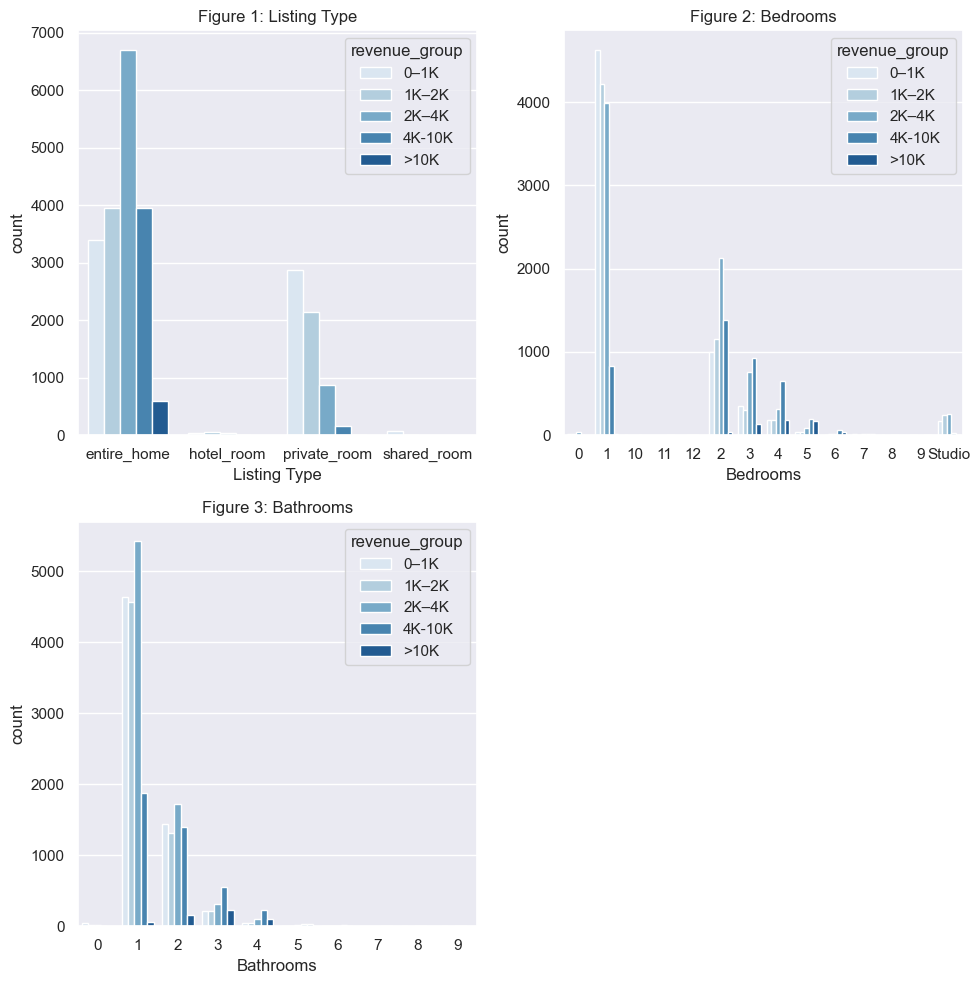

In [27]:
cat_cols = ['Listing Type','Bedrooms','Bathrooms']

n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cat_cols):
            ax_i = ax[r,c]
            sns.countplot(data = df, x=cat_cols[i], ax=ax_i, hue = 'revenue_group', palette = 'Blues' )
            ax_i.set(title = f'Figure {i+1}: {cat_cols[i]}')
plt.tight_layout()
ax.flat[-1].set_visible(False);

* `Entire Home` listing clearly dominate across all revenue categories. Most hosts earns between 2K-4K, followed by 0-2K and 4K-10K ranges. Overall, this listing type consistently outperforms all others in revenue potential.
* `Private Room` has decent share, but are concentrated in the 0-4K revenue brackets. Rarely do they have revenue >10K
* `Hotel Room` and `Shared Room` listings generate minimal revenue. It is rare for hosts to earn significantly from these types, suggesting limited profitability.

* `1-bedroom` listings are the most common across all revenue groups, particularly in the 0–1K, 1K–2K and 2K-4K brackets. However, they also appear significantly in higher revenue tiers, suggesting good earning potential.
* `2-bedroom` properties stand out in the 2K–4K and 4K–10K groups, indicating the more bedrooms the higher reting prices.
* `Studios` and `0-bedroom` listings are abundant but tend to cluster in the lower revenue brackets, rarely crossing into >$4K territory.
* Listings with `3–5 bedrooms` are less frequent but more likely to generate higher revenues (especially in >4K and >10K), implying these properties are fewer but more lucrative.
* Properties with `6+ bedrooms` are rare and contribute minimally across all revenue levels, possibly due to niche demand or availability.

* `1-bathroom` listings dominate the dataset, with strong representation across all revenue groups, especially in the 0–2K range. This suggests they're the most common setup for hosts but not necessarily the most profitable.
* `2-bathroom` properties are the next most common, with a noticeable shift toward the 2K–4K and 4K–10K brackets — implying better revenue potential than single-bathroom listings.
* Listings with `3 or more bathrooms` are relatively rare, but they show an increasing share in the higher revenue groups, particularly >$4K. This indicates that more bathrooms may be associated with larger properties capable of generating higher revenue.

### Correlating numerical features
* Numerical Features: `cleaning_fee`,`Available Days`,`Occupancy Rate`,`Reservation Days`,`ADR (USD)`,`Number Of Reservation`
* Target Varibale: `Revenue (USD)`

In [34]:
df

,Property Type,Listing Type,Bedrooms,Bathrooms,City,Latitude,Longitude,cleaning_fee,Reporting Month,Available Days,Occupancy Rate,Reservation Days,ADR (USD),Number Of Reservation,Revenue (USD),revenue_group
0,Entire home,entire_home,2,2,Brighton,50.82214,-0.14175,46.0,2023-10,31,46.5,12,244,1,2974,2K–4K
1,Entire rental unit,entire_home,1,1,Brighton,50.82745,-0.14099,NaN,2023-10,31,7.7,2,171,2,342,0–1K
2,Private room in rental unit,private_room,1,1,Brighton,50.82537,-0.18462,10.0,2023-10,31,15.5,4,73,2,312,0–1K
3,Entire townhouse,entire_home,6,3,Brighton,50.82828,-0.12467,260.0,2023-10,31,0.0,0,537,0,0,0–1K
4,Entire rental unit,entire_home,1,2,Hove,50.83128,-0.16963,33.0,2023-10,31,100.0,31,95,0,2945,2K–4K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24844,Entire vacation home,entire_home,2,1,Kemptown,50.82000,-0.13200,NaN,2022-11,30,100.0,26,151,5,3926,2K–4K
24845,Private room in townhouse,private_room,Studio,0,Brighton and Hove,50.82823,-0.12913,NaN,2022-11,29,37.2,9,81,4,729,0–1K
24846,Entire condo,entire_home,1,2,Brighton and Hove,50.83145,-0.16843,NaN,2022-11,6,20.0,1,104,0,104,0–1K
24847,Entire condo,entire_home,1,1,Brighton and Hove,50.82802,-0.17510,NaN,2022-11,26,55.4,12,82,5,984,0–1K


In [35]:
# corr()
df_numerical = df[['cleaning_fee','Available Days','Occupancy Rate','Reservation Days','ADR (USD)','Number Of Reservation','Revenue (USD)']]
df_numerical_new = df_numerical.corr()
df_numerical_new

,cleaning_fee,Available Days,Occupancy Rate,Reservation Days,ADR (USD),Number Of Reservation,Revenue (USD)
cleaning_fee,1.000000,0.030830,-0.086555,-0.066718,0.429640,-0.100864,0.360672
Available Days,0.030830,1.000000,-0.024645,0.524480,-0.037140,0.233394,0.269793
Occupancy Rate,-0.086555,-0.024645,1.000000,0.779206,-0.132787,0.337116,0.362928
Reservation Days,-0.066718,0.524480,0.779206,1.000000,-0.129945,0.401049,0.476179
ADR (USD),0.429640,-0.037140,-0.132787,-0.129945,1.000000,-0.065004,0.629663
Number Of Reservation,-0.100864,0.233394,0.337116,0.401049,-0.065004,1.000000,0.221069
Revenue (USD),0.360672,0.269793,0.362928,0.476179,0.629663,0.221069,1.000000


In [36]:
# ones_like
ones_corr = np.ones_like(df_numerical_new, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [37]:
# np.triu() - return upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

In [38]:
mask_update = mask[1:,:-1]
df_numerical_update = df_numerical_new.iloc[1:,:-1]

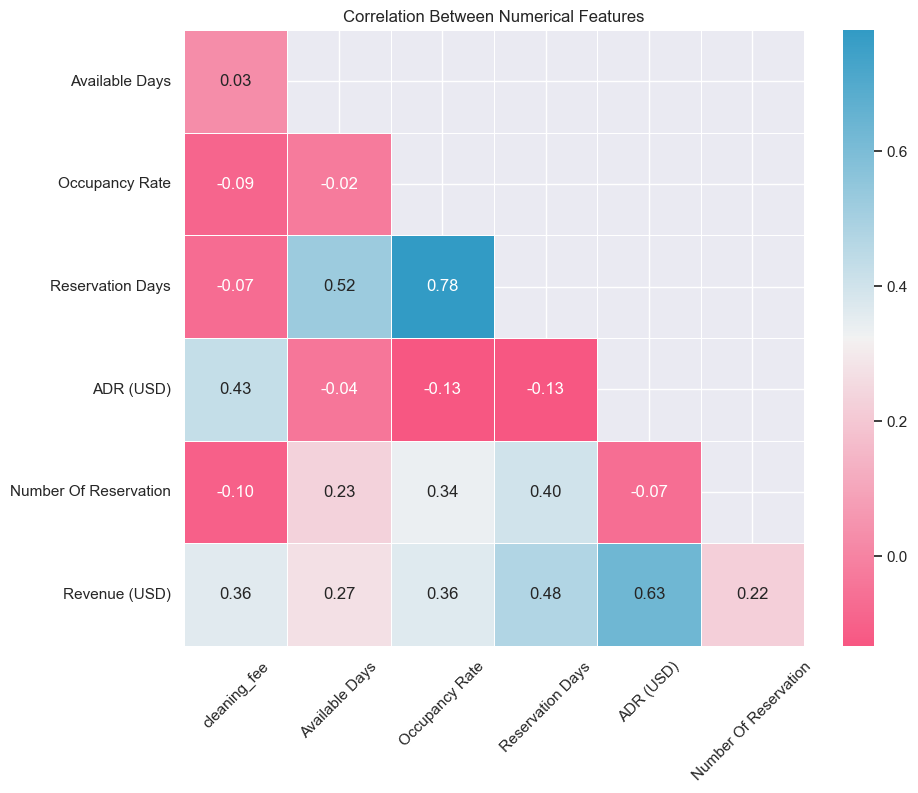

In [39]:
fig, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(0,230,90,60, as_cmap =True)
sns.heatmap(data = df_numerical_update,mask=mask_update,
            annot = True,fmt = '.2f',
            linewidths = 0.5, linecolor = 'White', cmap = cmap)
plt.xticks(rotation=45)
ax.set(title='Correlation Between Numerical Features');

* When I think about this kind of business (Airbnb for rent), I expect a strong positive correlation between `Revenue (USD)` and operational metrics like `Occupancy Rate`, `Reservation Days`, `Number of Resevation`, since higher usage typically drives revenue.
* However, the correlation heatmap reveals a different story — with correlation coefficients ranging only from 0.27 to 0.48. This indicates a weak to moderate relationship, suggesting that revenue is influenced by additional factors beyond just booking volume.

## Summary

C:\Users\Admin\AppData\Local\Temp\ipykernel_8360\3775852228.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_revenue = df.groupby(['Reporting Month','Listing Type'])['Revenue (USD)'].sum().reset_index()


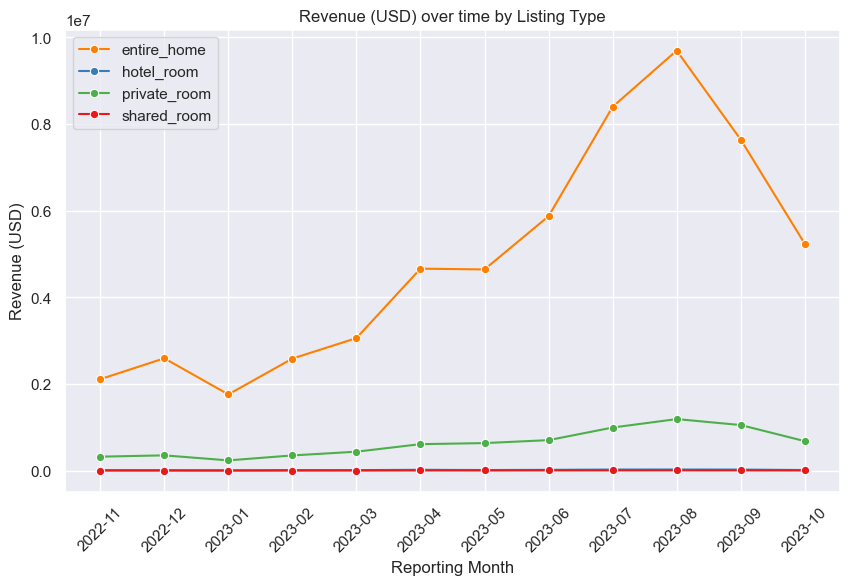

In [109]:
df_revenue = df.groupby(['Reporting Month','Listing Type'])['Revenue (USD)'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10,6))

palette = {
    'entire_home': '#ff7f00',   
    'hotel_room': '#377eb8',    
    'private_room': '#4daf4a', 
    'shared_room': '#e41a1c'   
}

sns.lineplot(data = df_revenue, x='Reporting Month',y='Revenue (USD)', hue = 'Listing Type', marker = 'o', palette = palette)
ax.set(title= 'Revenue (USD) over time by Listing Type')
plt.xticks(rotation = 45)
plt.legend();

* According to the chart, most of the revenue come from `Entire home` segment, followd by `Private home`
* Revenue steadily increased from January 2023 to June 2023, followed by a sharp peak in July 2023. This trend suggests a seasonal pattern because it's during summer vacation; therefore the demand for traveling is high
* After that, the Revenue is gradually declines

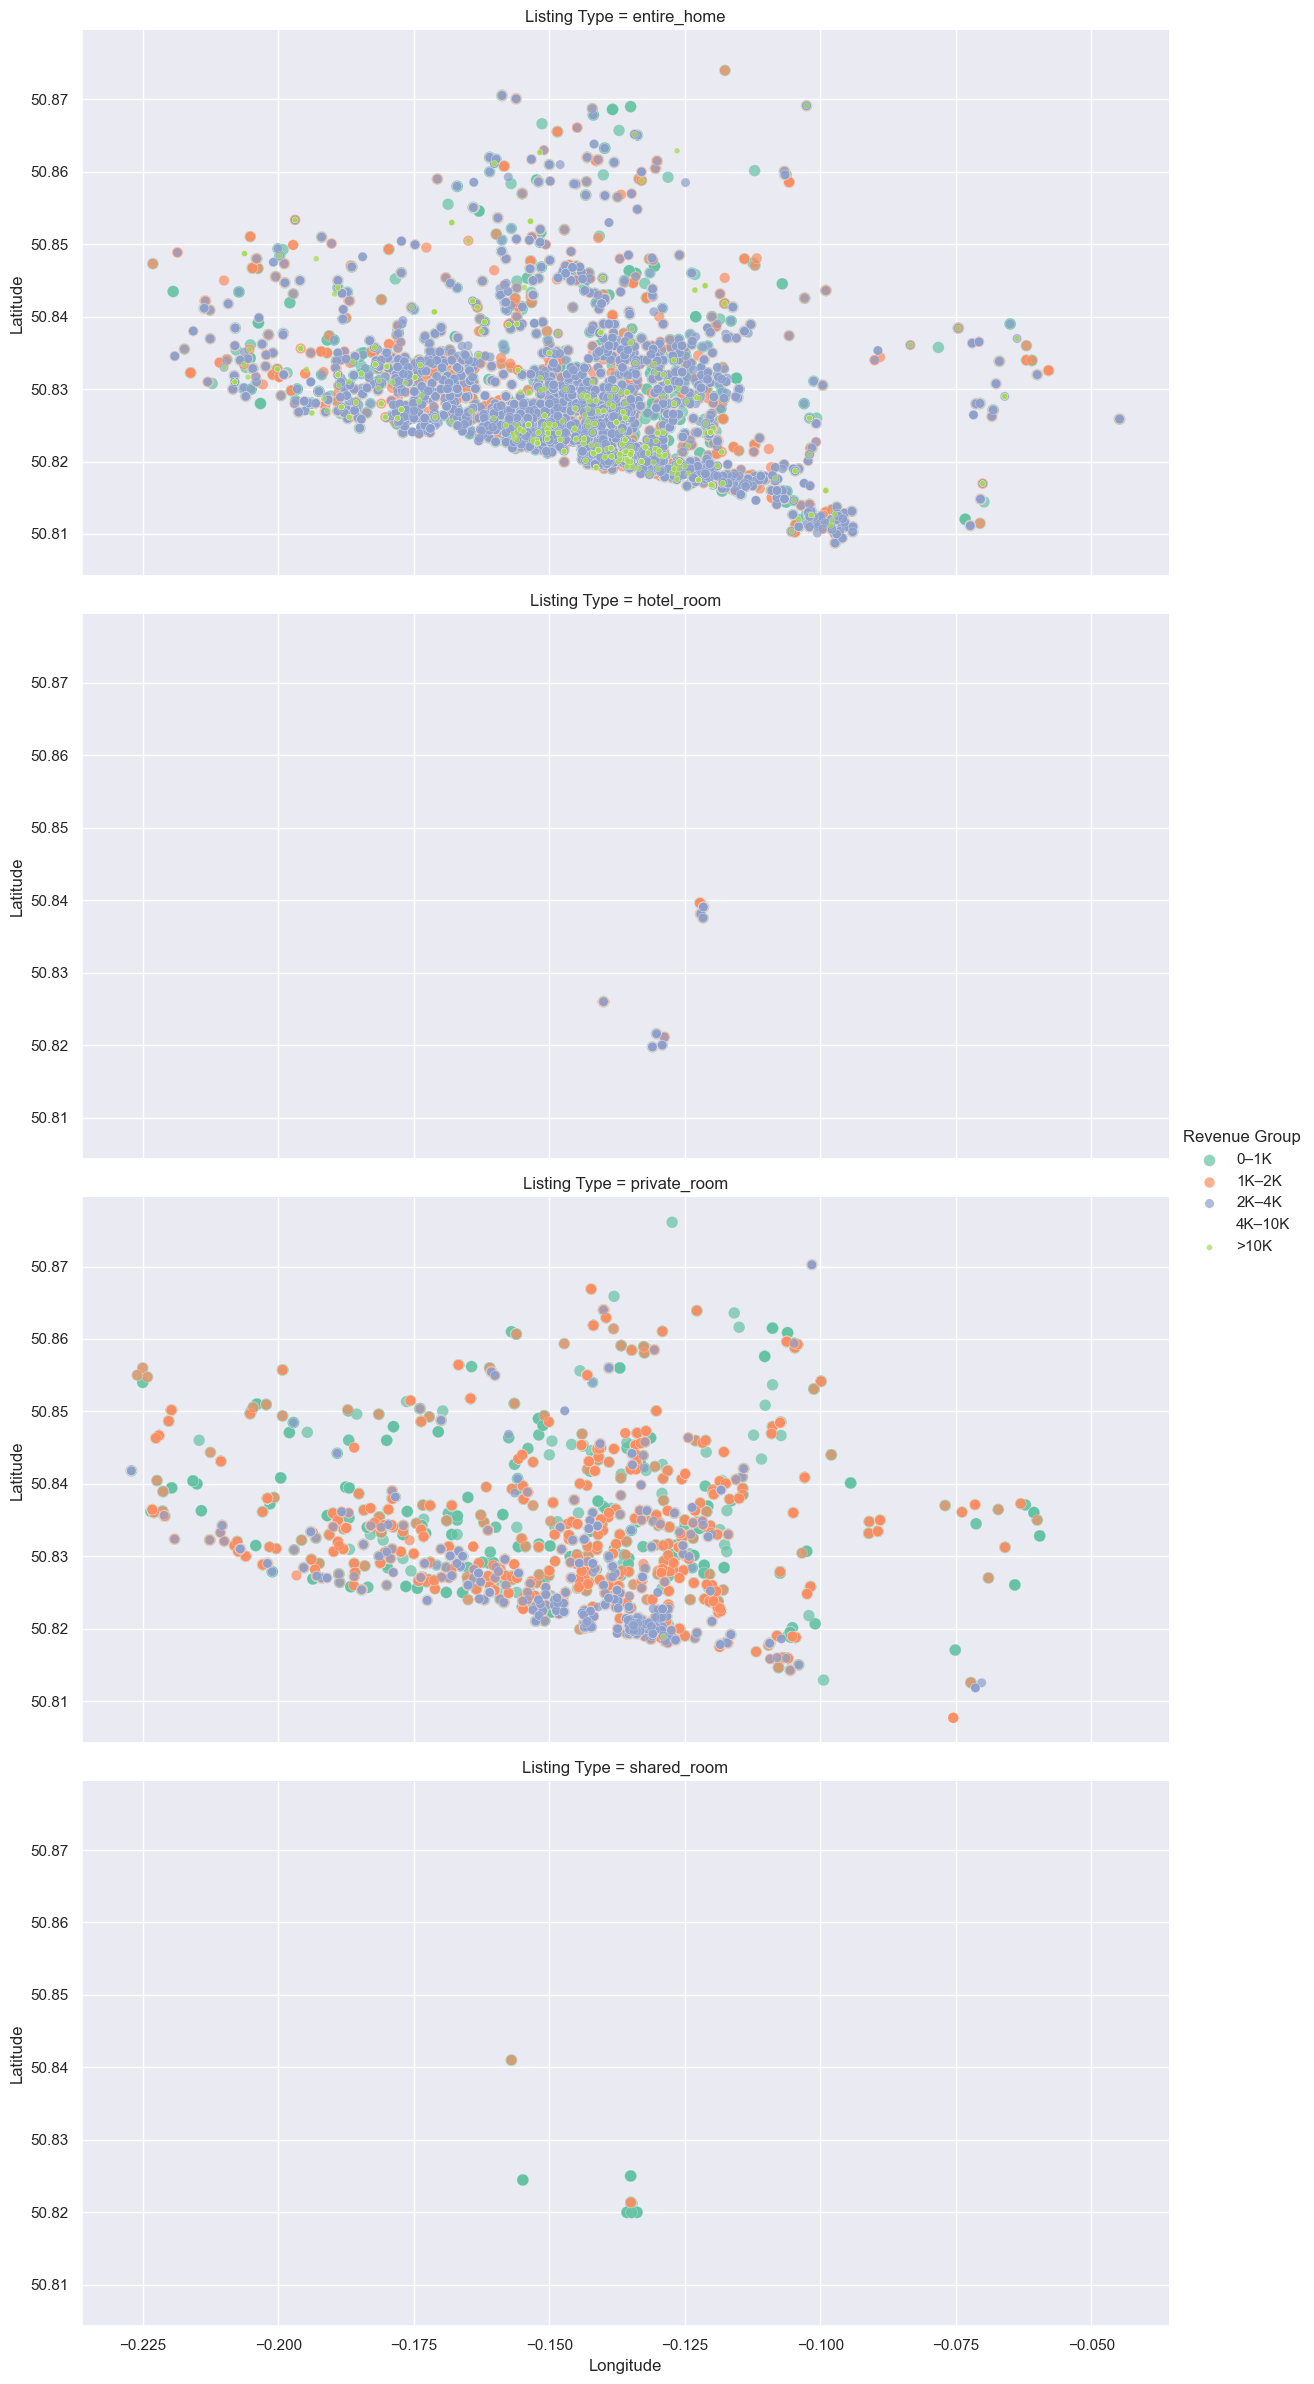

In [191]:
# Map size to revenue_group
size_map = {
    '0–1K': 20,
    '1K–2K': 40,
    '2K–4K': 60,
    '4K–10K': 80,
    '>10K': 100
}
df['revenue_size'] = df['revenue_group'].map(size_map)

# Create FacetGrid
new_fg = sns.FacetGrid(
    data=df,
    row='Listing Type',
    hue='revenue_group',
    palette='Set2',
    height=6,
    aspect=2
)

# Use map_dataframe and suppress Seaborn's legend creation
new_fg.map_dataframe(
    sns.scatterplot,
    x='Longitude',
    y='Latitude',
    size='revenue_size',
    alpha=0.7,
    edgecolor='white',
    linewidth=0.2,
    legend=False  # ⛔️ turn off automatic legend to avoid label error
)

# Add legend only for hue
new_fg.add_legend(title='Revenue Group');

* For the `entire_home` listing type, most hosts earn around 2K–4K. Those who earn more than 10K are concentrated in the city center, which suggests that rental prices are likely higher in central areas compared to the outskirts.

* For `private_room` listings, host revenues are more evenly distributed across three groups: 0–1K, 1K–2K, and 2K–4K. Rarely do they earn above 10k

* However, a few high-revenue listings (>10K) appear in outlying regions. These may represent luxury accommodations, resorts, or vacation homes situated in scenic or exclusive areas outside the city core